# **Content-Based Movie Recommendation System**

Dataset link - https://www.kaggle.com/datasets/gazu468/tmdb-10000-movies-dataset

## Introduction

In this notebook, we'll implement a content-based movie recommendation system using **TF-IDF** (Term Frequency-Inverse Document Frequency) and **cosine similarity**. Content-based recommendation systems recommend items which are similar in item desctiption. In our case, we'll recommend movies based on their plot descriptions.

## Dataset

We'll be using a dataset containing information about movies, including their **Titles, Genres, Cast , Crew, Tags and Plot Descriptions**.

Here's a sample of the dataset:

| Title | Genre | Plot Description |
| ----- | ----- | ----------------- |
| The Shawshank Redemption | Drama | Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency. |
| The Godfather| Crime, Drama | The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son. |
| The Dark Knight | Action, Crime, Drama |When the menace known as The Joker emerges from his mysterious past, he wreaks havoc and chaos on the people of Gotham.|
| Pulp Fiction | Crime, Drama | The lives of two mob hitmen, a boxer, a gangster's wife, and a pair of diner bandits intertwine in four tales of violence and redemption. |
| Inception | Action, Adventure, Sci-Fi | A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O. |

## **Explanation of TF-IDF and Cosine Similarity**

### TF-IDF (Term Frequency-Inverse Document Frequency)

![TF-IDF](https://i.postimg.cc/0yMPpYzh/tfidf.jpg "TF-IDF")

TF-IDF is a numerical statistic that reflects the importance of a word in a document(row) relative to a collection of documents(whole corpus). It is calculated in two parts: Term Frequency (TF) and Inverse Document Frequency (IDF). 

- **Term Frequency (TF)** measures how frequently a term occurs in a document(row). It is calculated as the ratio of the number of times a term appears in a document(row) to the total number of words in the document(row).
- **Inverse Document Frequency (IDF)** measures how important a term is across the entire corpus. It is calculated as the logarithm of the ratio of the total number of rows to the number of rows containing the term.
- **TF-IDF** is the product of TF and IDF, combining the local importance of a term in a document (TF) with its global importance across the document corpus (IDF).

We'll convert the plot descriptions into numerical vectors using TF-IDF. TF-IDF is a numerical statistic that reflects the importance of a word in a row relative to a all rows(corpus).

Here's an example TF-IDF representation for the plot descriptions:

| Word       | Doc 1: The Shawshank Redemption | Doc 2: The Godfather | Doc 3: The Dark Knight | Doc 4: Pulp Fiction | Doc 5: Inception |
|------------|----------------------------------|----------------------|------------------------|----------------------|------------------|
| imprisoned |               0.34               |         0.00         |          0.00          |         0.00         |        0.00      |
| men        |               0.34               |         0.00         |          0.00          |         0.00         |        0.00      |
| bond       |               0.34               |         0.00         |          0.00          |         0.00         |        0.00      |
| years      |               0.34               |         0.00         |          0.00          |         0.00         |        0.00      |
| solace     |               0.34               |         0.00         |          0.00          |         0.00         |        0.00      |
| redemption |               0.34               |         0.00         |          0.00          |         0.00         |        0.00      |
| acts       |               0.34               |         0.00         |          0.00          |         0.00         |        0.00      |
| common     |               0.34               |         0.00         |          0.00          |         0.00         |        0.00      |
| decency    |               0.34               |         0.00         |          0.00          |         0.00         |        0.00      |
| aging      |               0.00               |         0.29         |          0.00          |         0.00         |        0.00      |
| patriarch  |               0.00               |         0.29         |          0.00          |         0.00         |        0.00      |
| organized  |               0.00               |         0.29         |          0.00          |         0.00         |        0.00      |
| crime      |               0.00               |         0.29         |          0.00          |         0.33         |        0.00      |
| dynasty    |               0.00               |         0.29         |          0.00          |         0.00         |        0.00      |
| transfers  |               0.00               |         0.29         |          0.00          |         0.00         |        0.00      |
| control    |               0.00               |         0.29         |          0.00          |         0.00         |        0.00      |
| empire     |               0.00               |         0.29         |          0.00          |         0.00         |        0.00      |
| reluctant  |               0.00               |         0.29         |          0.00          |         0.00         |        0.00      |
| son        |               0.00               |         0.29         |          0.00          |         0.00         |        0.00      |

### Cosine Similarity

Cosine similarity calculates the cosine of the angle between two vectors. If the vectors are similar, the angle between them will be small, and the cosine similarity value will be closer to 1. If the vectors are dissimilar, the angle will be large, and the cosine similarity value will be closer to 0. 

- Cosine similarity is often used in text analysis to measure the similarity between document vectors, such as TF-IDF vectors.
- It is calculated as the dot product of the two vectors divided by the product of their magnitudes.

![Cosine](https://i.postimg.cc/jdkRwgSz/Cosine.jpg)

Once we have the TF-IDF representation for each movie, we'll calculate the cosine similarity between movies' TF-IDF vectors. Cosine similarity measures the cosine of the angle between two vectors, giving a measure of similarity between them.

Here's an example cosine similarity matrix for the movies:

|                             | The Shawshank Redemption | The Godfather | The Dark Knight | Pulp Fiction | Inception |
| --------------------------- | ------------------------ | ------------- | --------------- | ------------ | --------- |
| The Shawshank Redemption    |           1.00           |     0.02      |       0.01      |     0.03     |   0.00    |
| The Godfather               |           0.02           |     1.00      |       0.00      |     0.14     |   0.00    |
| The Dark Knight             |           0.01           |     0.00      |       1.00      |     0.00     |   0.33    |
| Pulp Fiction                |           0.03           |     0.14      |       0.00      |     1.00     |   0.05    |
| Inception                   |           0.00           |     0.00      |       0.33      |     0.05     |   1.00    |

Recommendation
--------------

To recommend movies to a user, we'll select movies with the highest cosine similarity.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-10000-movies-dataset/10000 Movies Data
/kaggle/input/tmdb-10000-movies-dataset/__notebook_source__.ipynb
/kaggle/input/tmdb-10000-movies-dataset/10000 Credits Data


# Loading Data

In [8]:
movies = pd.read_csv("/kaggle/input/tmdb-10000-movies-dataset/10000 Movies Data",index_col=0)
credits = pd.read_csv("/kaggle/input/tmdb-10000-movies-dataset/10000 Credits Data",index_col=0)

In [19]:
df = pd.concat([movies,credits.drop(columns = ["title"])],axis=1)

In [20]:
df.sample(2)

,Movie_id,title,Genres,release_date,Keywords,overview,poster_path,Budget,Revenue,popularity,vote_average,vote_count,Movie_id,Cast,Crew
2679,10925,The Return of the Living Dead,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",1985-04-25,"[{'id': 1227, 'name': 'cemetery'}, {'id': 2452...",When foreman Frank shows new employee Freddy a...,/qVTFBabgnWz4jZ8wOQRYZI5EITF.jpg,14237880,14237880,43.634,7.2,1523,10925,"[{'adult': False, 'gender': 2, 'id': 62019, 'k...","[{'adult': False, 'gender': 2, 'id': 1098, 'kn..."
6104,175291,Cheap Thrills,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",2013-03-08,"[{'id': 2150, 'name': 'cocaine'}, {'id': 3688,...","Recently fired and facing eviction, a new dad ...",/cnGzB8L2Y4oEyAZ4VvLxAwTRA3N.jpg,0,0,8.000,6.4,349,175291,"[{'adult': False, 'gender': 2, 'id': 60846, 'k...","[{'adult': False, 'gender': 2, 'id': 92993, 'k..."


In [65]:
df.drop(columns = ["Movie_id","release_date","Budget","Revenue","popularity","vote_average","vote_count"],inplace=True)

In [23]:
df["Genres"][0]

"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}]"

In [27]:
import ast
ast.literal_eval(df["Genres"][0])

[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}]

In [28]:
def extract(L):
    genres = []
    for element in ast.literal_eval(L):
        genres.append(element["name"])
        
    return genres

extract(df["Genres"][0])

['Drama', 'Crime']

In [29]:
df["Genres"].apply(extract)

0                   [Drama, Crime]
1                   [Drama, Crime]
2                   [Drama, Crime]
3         [Comedy, Drama, Romance]
4            [Drama, History, War]
                   ...            
9975     [Action, Crime, Thriller]
9976                      [Horror]
9977    [Comedy, Family, TV Movie]
9978                      [Action]
9979                      [Horror]
Name: Genres, Length: 9980, dtype: object

In [30]:
df["Genres"] = df["Genres"].apply(extract)

In [38]:
df["Keywords"][0]

"[{'id': 131, 'name': 'italy'}, {'id': 697, 'name': 'loss of loved one'}, {'id': 699, 'name': 'love at first sight'}, {'id': 818, 'name': 'based on novel or book'}, {'id': 1295, 'name': 'europe'}, {'id': 1715, 'name': 'symbolism'}, {'id': 4677, 'name': 'patriarch'}, {'id': 10291, 'name': 'organized crime'}, {'id': 10391, 'name': 'mafia'}, {'id': 10909, 'name': 'lawyer'}, {'id': 11001, 'name': 'religion'}, {'id': 15095, 'name': 'revenge motive'}, {'id': 33421, 'name': 'crime family'}, {'id': 155538, 'name': 'sicilian mafia'}, {'id': 156043, 'name': 'religious hypocrisy'}, {'id': 163656, 'name': 'gun violence'}, {'id': 165725, 'name': 'rise to power'}, {'id': 180173, 'name': 'dead horse'}, {'id': 181858, 'name': 'gang violence'}, {'id': 207883, 'name': '1940s'}, {'id': 208611, 'name': '1950s'}, {'id': 257630, 'name': 'mafia war'}, {'id': 295351, 'name': 'part of trilogy'}]"

In [39]:
extract(df["Keywords"][0])

['italy',
 'loss of loved one',
 'love at first sight',
 'based on novel or book',
 'europe',
 'symbolism',
 'patriarch',
 'organized crime',
 'mafia',
 'lawyer',
 'religion',
 'revenge motive',
 'crime family',
 'sicilian mafia',
 'religious hypocrisy',
 'gun violence',
 'rise to power',
 'dead horse',
 'gang violence',
 '1940s',
 '1950s',
 'mafia war',
 'part of trilogy']

In [41]:
df["Keywords"] = df["Keywords"].apply(extract)

In [44]:
ast.literal_eval(df["Cast"][0])[:3]

[{'adult': False,
  'gender': 2,
  'id': 3084,
  'known_for_department': 'Acting',
  'name': 'Marlon Brando',
  'original_name': 'Marlon Brando',
  'popularity': 15.274,
  'profile_path': '/fuTEPMsBtV1zE98ujPONbKiYDc2.jpg',
  'cast_id': 5,
  'character': 'Don Vito Corleone',
  'credit_id': '52fe422bc3a36847f8009357',
  'order': 0},
 {'adult': False,
  'gender': 2,
  'id': 1158,
  'known_for_department': 'Acting',
  'name': 'Al Pacino',
  'original_name': 'Al Pacino',
  'popularity': 32.169,
  'profile_path': '/fMDFeVf0pjopTJbyRSLFwNDm8Wr.jpg',
  'cast_id': 6,
  'character': 'Don Michael Corleone',
  'credit_id': '52fe422bc3a36847f800935b',
  'order': 1},
 {'adult': False,
  'gender': 2,
  'id': 3085,
  'known_for_department': 'Acting',
  'name': 'James Caan',
  'original_name': 'James Caan',
  'popularity': 23.916,
  'profile_path': '/bGyOCCOIgcIyKjOGLoXoyp0XWHf.jpg',
  'cast_id': 7,
  'character': "Santino 'Sonny' Corleone",
  'credit_id': '52fe422bc3a36847f800935f',
  'order': 2}]

In [47]:
def extract_cast(L):
    cast = []
    for element in ast.literal_eval(L)[:3]:
        cast.append(element["name"])
        
    return cast

extract_cast(df["Cast"][0])

['Marlon Brando', 'Al Pacino', 'James Caan']

In [61]:
df["Cast"] = df["Cast"].apply(extract_cast)

In [55]:
for member in ast.literal_eval(df["Crew"][0]):
    if(member["job"]=="Director"):
        print(member["name"])

Francis Ford Coppola


In [58]:
df["Crew"].apply(lambda x : [member["name"] for member in ast.literal_eval(x) if(member["job"]=="Director")][0])

0       Francis Ford Coppola
1             Frank Darabont
2       Francis Ford Coppola
3              Aditya Chopra
4           Steven Spielberg
                ...         
9975               Max Adams
9976       Grégory Levasseur
9977            Peter Hewitt
9978            Renny Harlin
9979               Gil Kenan
Name: Crew, Length: 9980, dtype: object

In [59]:
df["Crew"] = df["Crew"].apply(lambda x : [member["name"] for member in ast.literal_eval(x) if(member["job"]=="Director")][0])

In [66]:
df.head(2)

,title,Genres,Keywords,overview,poster_path,Cast,Crew
0,The Godfather,"[Drama, Crime]","[italy, loss of loved one, love at first sight...","Spanning the years 1945 to 1955, a chronicle o...",/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,"[Marlon Brando, Al Pacino, James Caan]",Francis Ford Coppola
1,The Shawshank Redemption,"[Drama, Crime]","[prison, corruption, police brutality, based o...",Framed in the 1940s for the double murder of h...,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,"[Tim Robbins, Morgan Freeman, Bob Gunton]",Frank Darabont


In [91]:
import re
import string

re.sub("[^A-Za-z0-9/s]+"," ",df["overview"][0]).strip()

'Spanning the years 1945 to 1955 a chronicle of the fictional Italian American Corleone crime family When organized crime family patriarch Vito Corleone barely survives an attempt on his life his youngest son Michael steps in to take care of the would be killers launching a campaign of bloody revenge'

In [93]:
df["overview"] = df["overview"].apply(lambda x: re.sub("[^A-Za-z0-9/s]+"," ",str(x)).strip())

In [99]:
df_tags = []

for i in range(len(df)):
    row = df.iloc[i]
    tags = ""
    tags= tags + " ".join(row["Genres"])
    tags= tags +" "+" ".join(row["Keywords"])
    tags= tags +" "+ row["overview"]
    tags= tags + " ".join([element.replace(" ","") for element in row["Cast"]])
    tags= tags +" "+ row["Crew"].replace(" ","")
    
    df_tags.append(tags)
    

In [100]:
df_tags

['Drama Crime italy loss of loved one love at first sight based on novel or book europe symbolism patriarch organized crime mafia lawyer religion revenge motive crime family sicilian mafia religious hypocrisy gun violence rise to power dead horse gang violence 1940s 1950s mafia war part of trilogy Spanning the years 1945 to 1955 a chronicle of the fictional Italian American Corleone crime family When organized crime family patriarch Vito Corleone barely survives an attempt on his life his youngest son Michael steps in to take care of the would be killers launching a campaign of bloody revengeMarlonBrando AlPacino JamesCaan FrancisFordCoppola',
 'Drama Crime prison corruption police brutality based on novel or book prison cell delinquent parole board prison escape wrongful imprisonment framed for murder 1940s Framed in the 1940s for the double murder of his wife and her lover upstanding banker Andy Dufresne begins a new life at the Shawshank prison where he puts his accounting skills to

In [101]:
df["tags"] = df_tags

In [102]:
df.sample(2)

,title,Genres,Keywords,overview,poster_path,Cast,Crew,tags
7411,Pride and Prejudice and Zombies,"[Romance, Horror, Comedy, Thriller]","[based on novel or book, dystopia, shaolin, pr...",A zombie outbreak has fallen upon the land in ...,/jsJlOhVHiz1xXr36616EI8tJ4b2.jpg,"[Lily James, Sam Riley, Jack Huston]",Burr Steers,Romance Horror Comedy Thriller based on novel ...
4416,The Girl in the Fog,"[Crime, Thriller, Mystery]","[based on novel or book, alpine village]",A gripping and chilling thriller that brings u...,/fuJApAPgHrur08y6icGB5k5Umzo.jpg,"[Toni Servillo, Jean Reno, Alessio Boni]",Donato Carrisi,Crime Thriller Mystery based on novel or book ...


In [103]:
X = df.drop(columns = ["Genres","Keywords","overview","Cast","Crew"])

In [104]:
X

,title,poster_path,tags
0,The Godfather,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,Drama Crime italy loss of loved one love at fi...
1,The Shawshank Redemption,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,Drama Crime prison corruption police brutality...
2,The Godfather Part II,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,Drama Crime italy italian american cuba symbol...
3,Dilwale Dulhania Le Jayenge,/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,Comedy Drama Romance Raj is a rich carefree h...
4,Schindler's List,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,Drama History War based on novel or book facto...
...,...,...,...
9975,Precious Cargo,/dOQv2PDBu9bBCZRLeRp6QQYJDr3.jpg,Action Crime Thriller crime boss heist After a...
9976,The Pyramid,/joPb4PUPP7xClD6XPiQ7laBEtZf.jpg,Horror monster darkness desert archaeologist f...
9977,Home Alone: The Holiday Heist,/6JPrRC0JPM06y17pUXD6w1xMvKi.jpg,Comedy Family TV Movie christmas 8 year old Fi...
9978,Driven,/2aN2BBAbRyfEpfxZAQY82T8zWRq.jpg,Action competition career sports automobile Ta...


# Vectorizing

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=True,max_features=35000,stop_words="english")
vectors = vectorizer.fit_transform(X["tags"]).toarray()

In [170]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculating Cosine Similarity

In [171]:
similarity = cosine_similarity(vectors)

In [172]:
similarity

array([[1.        , 0.04345659, 0.42086712, ..., 0.01295474, 0.        ,
        0.05028312],
       [0.04345659, 1.        , 0.01325558, ..., 0.00542092, 0.01469922,
        0.        ],
       [0.42086712, 0.01325558, 1.        , ..., 0.01661624, 0.        ,
        0.01726387],
       ...,
       [0.01295474, 0.00542092, 0.01661624, ..., 1.        , 0.00758831,
        0.06409702],
       [0.        , 0.01469922, 0.        , ..., 0.00758831, 1.        ,
        0.        ],
       [0.05028312, 0.        , 0.01726387, ..., 0.06409702, 0.        ,
        1.        ]])

# Testing

Batman Returns.png


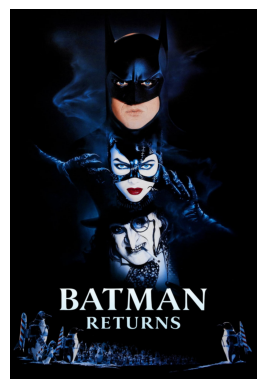

Title: Batman Returns
Description: While Batman deals with a deformed man calling himself the Penguin an employee of a corrupt businessman transforms into the Catwoman

The Dark Knight.png


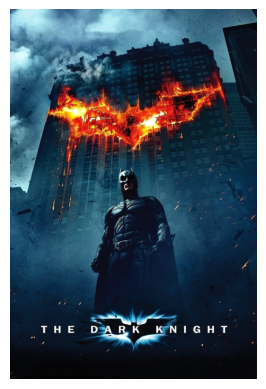

Title: The Dark Knight
Description: Batman raises the stakes in his war on crime With the help of Lt Jim Gordon and District Attorney Harvey Dent Batman sets out to dismantle the remaining criminal organizations that plague the streets The partnership proves to be effective but they soon find themselves prey to a reign of chaos unleashed by a rising criminal mastermind known to the terrified citizens of Gotham as the Joker

Batman: Mask of the Phantasm.png


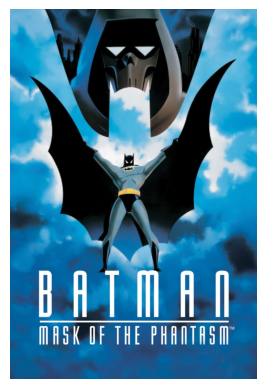

Title: Batman: Mask of the Phantasm
Description: When a powerful criminal who is connected to Bruce Wayne s ex girlfriend blames the Dark Knight for killing a crime lord Batman decides to fight against him

Batman: Under the Red Hood.png


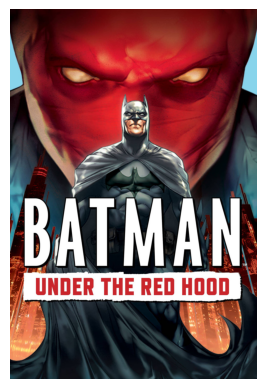

Title: Batman: Under the Red Hood
Description: One part vigilante one part criminal kingpin Red Hood begins cleaning up Gotham with the efficiency of Batman but without following the same ethical code

Batman: The Killing Joke.png


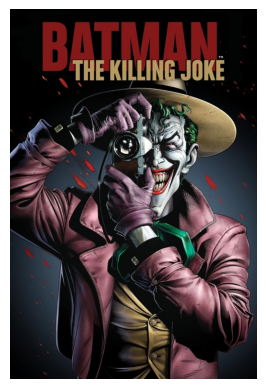

Title: Batman: The Killing Joke
Description: As Batman hunts for the escaped Joker the Clown Prince of Crime attacks the Gordon family to prove a diabolical point mirroring his own fall into madness



In [248]:
import urllib.request 
from PIL import Image

# Avengers: Age of Ultron
# Ant-Man
# After
# Pirates of the Caribbean: The Curse of the Black Pearl


input_index = df[df['title'] == 'Batman'].index[0]
poster_prefix = "https://image.tmdb.org/t/p/w1280"

score_list = []
for index,score in enumerate(similarity[input_index]):
    score_list.append((score,index))

sortedlist = sorted(score_list,reverse=True,key= lambda x: x[0])[1:6]

for element in sortedlist:
    
    index = element[1]
    
    poster_path_full = poster_prefix+df.iloc[index]["poster_path"]

    title = df.iloc[index]["title"]
    urllib.request.urlretrieve(poster_path_full,f"{title}.png") 
    img = Image.open(f"{title}.png")
    img.resize((200,300))
    print(img.filename)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    plt.close()
    
    print("Title: "+title)
    print("Description: "+df.iloc[index]["overview"],end="\n\n")
    
import os
for image in os.listdir("/kaggle/working/"):
    if image!=".virtual_documents":
        os.remove("/kaggle/working/"+image)

In [235]:
X.head(10)

,title,poster_path,tags
0,The Godfather,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,Drama Crime italy loss of loved one love at fi...
1,The Shawshank Redemption,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,Drama Crime prison corruption police brutality...
2,The Godfather Part II,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,Drama Crime italy italian american cuba symbol...
3,Dilwale Dulhania Le Jayenge,/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,Comedy Drama Romance Raj is a rich carefree h...
4,Schindler's List,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,Drama History War based on novel or book facto...
5,Spirited Away,/39wmItIWsg5sZMyRUHLkWBcuVCM.jpg,Animation Family Fantasy witch parent child re...
6,Impossible Things,/t2Ew8NZ8Ci2kqmoecZUNQUFDJnQ.jpg,Family Drama Matilde is a woman who after the...
7,12 Angry Men,/ppd84D2i9W8jXmsyInGyihiSyqz.jpg,Drama judge jurors sultriness death penalty fa...
8,Your Name.,/q719jXXEzOoYaps6babgKnONONX.jpg,Romance Animation Drama time travel race again...
9,Parasite,/7IiTTgloJzvGI1TAYymCfbfl3vT.jpg,Comedy Thriller Drama birthday party private l...


In [143]:
scores = similarity[input_index]
indices = list(range(len(scores)))

In [232]:
sorted(X["title"])

['#Alive',
 '#realityhigh',
 "'71",
 '(500) Days of Summer',
 '(T)Raumschiff Surprise - Periode 1',
 '*batteries not included',
 '+1',
 '...And Justice for All',
 '10 Cloverfield Lane',
 '10 Days Without Mum',
 '10 Things I Hate About You',
 '10 Years',
 '10,000 BC',
 '100 Feet',
 '100 Girls',
 '100 Meters',
 '100 Things',
 '100% Wolf',
 '101 Dalmatians',
 "101 Dalmatians II: Patch's London Adventure",
 '102 Dalmatians',
 '10x10',
 '11:14',
 '12 Angry Men',
 '12 Angry Men',
 '12 Dates of Christmas',
 '12 Feet Deep',
 '12 Rounds',
 '12 Rounds 2: Reloaded',
 '12 Strong',
 '12 Years a Slave',
 '127 Hours',
 '13',
 '13 Assassins',
 '13 Going on 30',
 '13 Hours: The Secret Soldiers of Benghazi',
 '13 Minutes',
 '13 Sins',
 '1408',
 '1492: Conquest of Paradise',
 '15 Minutes',
 '16 Blocks',
 '16 Wishes',
 '17 Again',
 '17 Girls',
 '18 Presents',
 '1900',
 '1917',
 '1922',
 '1941',
 '1BR',
 '2 Days in New York',
 '2 Days in Paris',
 '2 Fast 2 Furious',
 '2 Guns',
 '2 Hearts',
 '20,000 Leagues

In [251]:
import pickle as pkl

pkl.dump(similarity,open("/kaggle/working/similarities.pkl","wb"))
pkl.dump(df,open("/kaggle/working/dataframe.pkl","wb"))